# 1 exploratory data analysis

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("titanic-passengers.csv")

In [29]:
df.head() #printing the fist 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.tail() #printing the last 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# data dictionary

-Survived: 0 = No, 1 = Yes
-Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
-Sibsp: # of siblings / spouses aboard the Titanic
-Parch: # of parents / children aboard the Titanic
-Ticket: ticket number
-Cabin: cabin number
-Embarked: Port of embarkation C = Cherbourg, Q = queenstown, S = southhampton

In [31]:
df.shape #this function will give us how many rows and columns in the Titanic dataset

(891, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
# the distribution of numerical feature values across the samples:

#This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

# .Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
# .Survived is a categorical feature with 0 or 1 values.
# .Around 38% samples survived representative of the actual survival rate at 32%.
# .Most passengers (> 75%) did not travel with parents or children.
# .Nearly 30% of the passengers had siblings and/or spouse aboard.
# .Fares varied significantly with few passengers (<1%) paying as high as $512.
# .Few elderly passengers (<1%) within age range 65-80

# Let’s take a more detailed look at what data is actually missing:

In [35]:
# identify missing values of the 11 columns,add the stats to the dfdict
dfdict['MissingVal'] = df.isnull().sum()
dfdict

,0,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [36]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the df dict
dfdict['NUnique']=df.nunique()
dfdict

,0,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [37]:
# Identify the count for each variable, add the stats to dfdict
dfdict['Count']=df.count()
dfdict

,0,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [38]:
# 1. Embarked
""" Since ‘Embarked’ only had two missing values and the largest number of commuters embarked from Southampton, 
the probability of boarding from Southampton is higher. So, we fill the missing values with Southampton. However, 
instead of manually putting in Southampton, we would find the mode of the Embarked column and substitute missing values with it.
The mode is the most frequently occurring element in a series."""

df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [39]:
#2. Cabin
""" As the column ‘Cabin’ had a lot of missing data. I decided to categorize all the missing data as a different class. 
I named it NA. I assigned all the missing values with this value.
"""

df.Cabin = df.Cabin.fillna('NA')

In [ ]:
#3. Age
"""Age was the most intricate column to be filled. Age had 177 missing values. 
I initially categorized the people on the basis of their salutations. 
A basic Python’s string split was enough to extract the title from each name. 
There were 18 different titles.
"""

df['Salutation'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

#I then grouped the titles with Sex and PClass.

grp = df.groupby(['Sex', 'Pclass'])

# The median of the group was then substituted in the missing rows.

grp.Age.apply(lambda x: x.fillna(x.median()))
df.Age.fillna(df.Age.median, inplace = True)

In [ ]:
dfdict['MissingVal'] = df.isnull().sum()
dfdict

# 2. Visualization phase:

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Bar chart for categorical features

. Pclass

. Sex

. SibSp(# of siblings and spouse)

. Parch(# ofparents and children)

. Embarked

. Cabin

In [60]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    data =pd.DataFrame([survived, dead])
    data.index = ['Survived', 'Dead']
    data.plot(kind = 'bar', stacked = True, figsize = (10, 5))

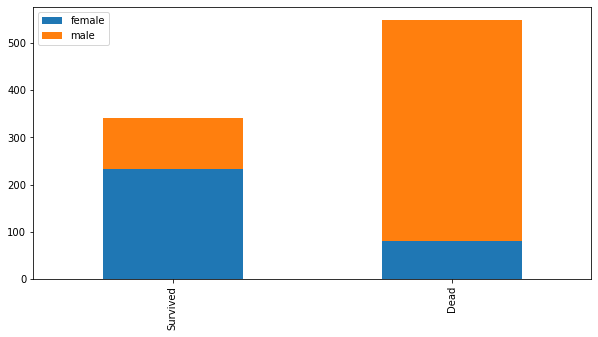

In [61]:
bar_chart('Sex')

The chart confirms that Women are more likely survived than Men

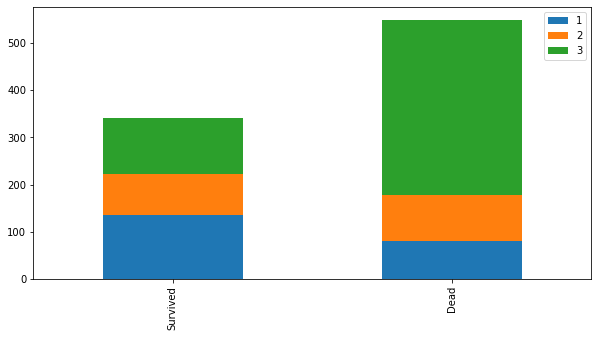

In [63]:
bar_chart('Pclass')

The chart confirms that the 1st class more likely survived than other classes
The chart confirms that the 3rd class more likely dead than other classes

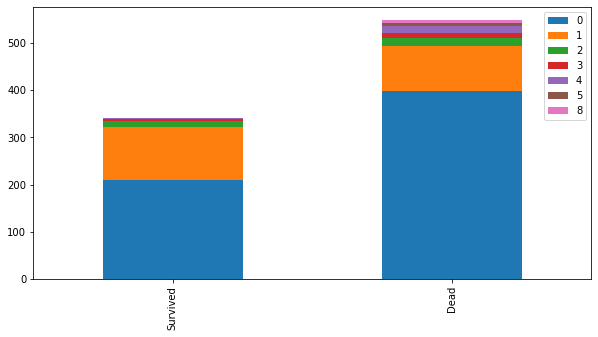

In [64]:
bar_chart('SibSp')

The chart confirms that a person aboarded with more than 2 siblings or spouse more likely survived
The chart confirms that a person aboarded without siblings or spouse more likely dead

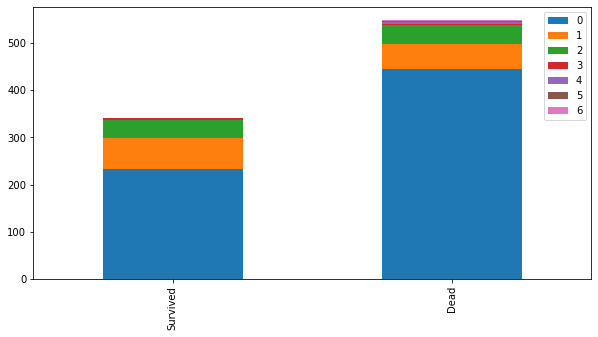

In [65]:
bar_chart('Parch')

The chart confirms that a person aboarded with more than 2 parents or children more likely survived
The chart confirms that a person aboarded alone more likely dead

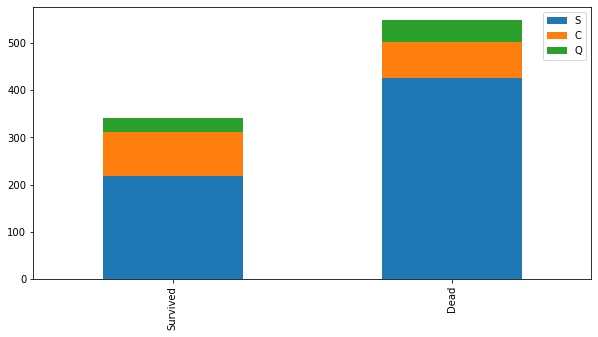

In [66]:
bar_chart('Embarked')

The chart confirms that a person aboarded from C slightly more likely survived
The chart confirms that a person aboarded from Q  more likely dead
The chart confirms that a person aboarded from S  more likely dead

In [86]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr , 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plt.show()

In [88]:
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [89]:
df_corr = df[cols].corr()

Text(0.5, 1.0, 'Simple Heatmap')

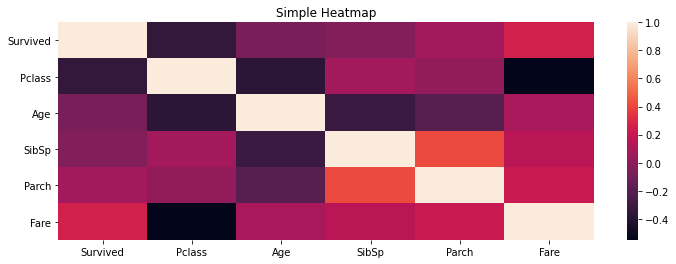

In [90]:
fig,ax = plt.subplots(figsize=(12,4))
sns.heatmap(df_corr)
ax.set_title('Simple Heatmap')